# Downloading the data

In [ ]:
!wget "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"

# Unzip the tar file

In [ ]:
!tar -xvf 'speech_commands_v0.01.tar.gz' -C data/

# Delete the extra files of extracted file

# Import the packages

In [1]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

# Data Exploration and Visualization

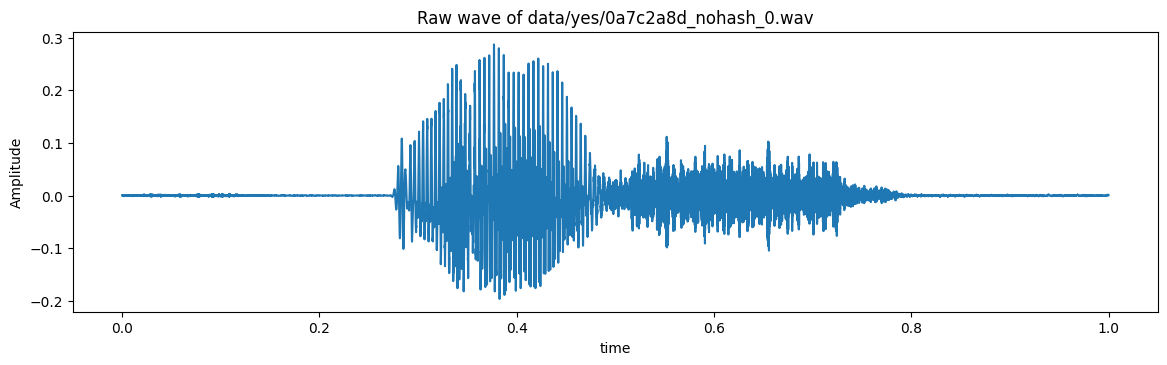

In [3]:
import pathlib
dataset_path=pathlib.Path(r"C:\Users\amrul\programming\datasets\nlp\speech_commands_v0.01")
#train_audio_path = 'data/'
train_audio_path=str(dataset_path)+"/"
samples,sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav',sr = 16000)
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'data/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

# Sampling rate

In [4]:
ipd.Audio(samples,rate = sample_rate)
print(sample_rate)

16000


# Resampling

In [6]:
samples = librosa.resample(y=samples,orig_sr=sample_rate,target_sr=8000)
ipd.Audio(samples,rate = 8000)

# Number of recording of each voices

In [7]:
labels = os.listdir(train_audio_path)
labels

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'LICENSE',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'README.md',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'testing_list.txt',
 'three',
 'tree',
 'two',
 'up',
 'validation_list.txt',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

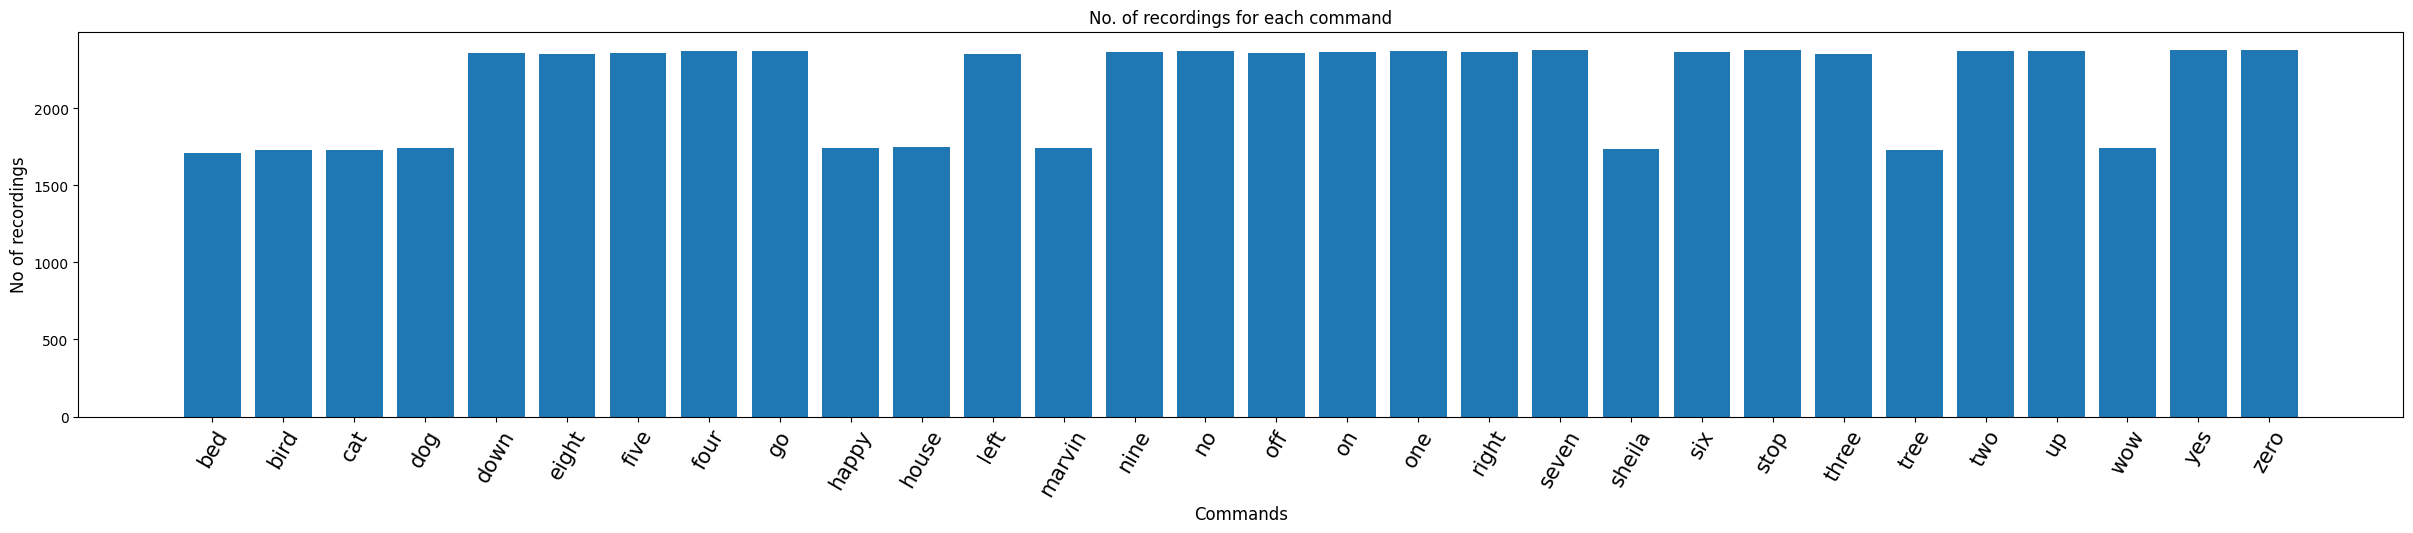

In [11]:
import pathlib
labels =[dir_or_file.name for dir_or_file in pathlib.Path(train_audio_path).iterdir() if dir_or_file.is_dir() and "background" not in dir_or_file.name]
#labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [12]:
print(labels)

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']


# Duration of recordings

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

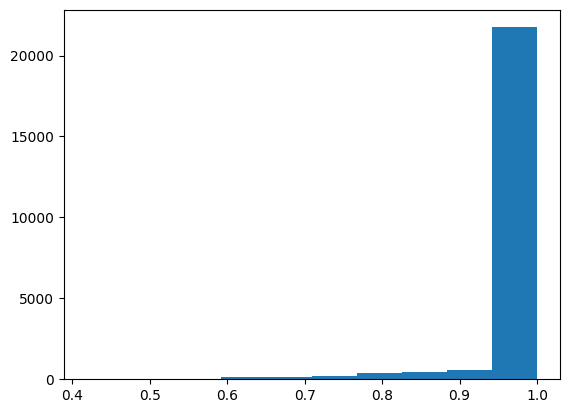

In [13]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

# Preprocessing the audio waves

In [15]:
#train_audio_path = 'data'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(y=samples, orig_sr=sample_rate, target_sr=8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

In [18]:
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

y = to_categorical(y,num_classes = len(labels))
all_waves = np.array(all_wave).reshape(-1,8000,1)

# Split into train and validation set

In [19]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(np.array(all_wave),np.array(y),stratify = y,test_size = 0.2,random_state=7)


# Model Architecture for this problem

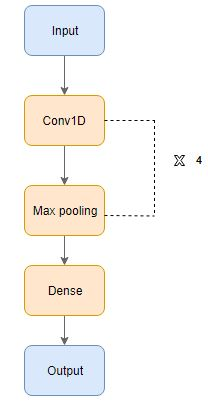

# Model building

In [20]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8000, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 7988, 8)        │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2662, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2662, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2652, 16)       │         1,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 884, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 884, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 876, 32)        │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 292, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 292, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 286, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 95, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 95, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,556,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,611,498 (6.15 MB)

 Trainable params: 1,611,498 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [23]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 10,min_delta = 0.0001)
mc = ModelCheckpoint('best_model.keras',monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')

In [24]:
history = model.fit(x_tr,y_tr,epochs = 100,callbacks=[es,mc],batch_size =32,validation_data = (x_val,y_val))


Epoch 1/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 47s 82ms/step - accuracy: 0.1616 - loss: 2.1974 - val_accuracy: 0.3983 - val_loss: 1.6114
Epoch 2/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.4258 - loss: 1.5653 - val_accuracy: 0.6200 - val_loss: 1.1212
Epoch 3/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.5680 - loss: 1.2317 - val_accuracy: 0.6857 - val_loss: 0.9255
Epoch 4/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 20817s 39s/step - accuracy: 0.6625 - loss: 0.9940 - val_accuracy: 0.7131 - val_loss: 0.8359
Epoch 5/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 1981s 4s/step - accuracy: 0.7131 - loss: 0.8562 - val_accuracy: 0.7492 - val_loss: 0.7359
Epoch 6/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.7318 - loss: 0.7811 - val_accuracy: 0.7933 - val_loss: 0.6228
Epoch 7/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.7597 - loss: 0.6958 - val_accuracy: 0.7952 - val_loss: 0.6444
Epoch 8/100
533/533 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.7689 - loss:

In [ ]:
model.save("best_model.hdf5")

# Diagnostic plot
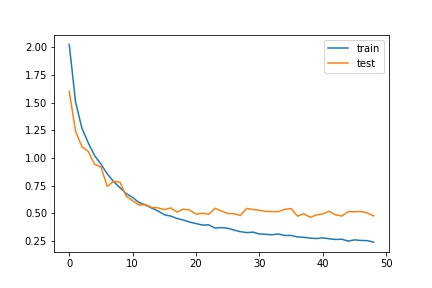

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.savefig("plot.jpg")
pyplot.show()

# Loading the best model

In [ ]:
from keras.models import load_model
model=load_model('best_model.hdf5')
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

# Prediction time! Make predictions on the validation data:

# prompts a user to record voice commands